<a href="https://www.kaggle.com/code/tusharaggarwal27/kmeans-mall-customers?scriptVersionId=112963773" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kmeans_Mall_Customers using K-Means Clustering


#github.com/tushar2704,kaggle.com/tusharaggarwal27, linkedin.com/in/tusharaggarwalinseec

**K Means Clustering** is an unsupervised learning algorithm that tries to cluster data based on their similarity. 

Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. 

In k means clustering, we have to specify the number of clusters we want the data to be grouped into. 

The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. 

Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. 

These two steps are repeated till the within cluster variation cannot be reduced any further. 

The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.


Importing the required libraries


In [1]:
# Data manipulation imports
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
# Reading the data as a DataFrame
market_data = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")

# Preview the DataFrame
market_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Creating some data**

make_blobs can be used to generate data based on normal distribution


In [3]:
from sklearn.datasets import make_blobs

In [4]:
#creating the data for example

data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=123)
data

(array([[ 2.82968803e+00, -2.73812431e+00],
        [ 3.32636434e+00, -2.42120727e+00],
        [ 5.25664715e+00, -1.59389565e+00],
        [-6.07724202e+00,  6.33992110e-01],
        [ 7.74299078e+00,  6.79085720e+00],
        [ 8.89273800e+00,  4.90887907e+00],
        [ 3.01904976e+00, -1.53130952e+00],
        [ 2.01229475e+00, -2.74318428e+00],
        [-4.69590698e+00, -1.86344216e+00],
        [ 4.97001752e+00, -2.31937053e+00],
        [ 6.02135100e+00, -6.25217878e+00],
        [ 5.53407627e+00, -1.02558534e+00],
        [ 9.09057189e+00,  4.13827770e+00],
        [ 2.45479953e+00, -3.34900437e-01],
        [ 8.34746810e+00,  5.04769262e+00],
        [ 8.73153386e+00,  1.34009721e+00],
        [ 1.23766465e+01,  2.74274939e+00],
        [ 1.99703750e+00, -1.03741012e+00],
        [ 5.43255430e+00, -4.94429195e-01],
        [ 5.73668073e+00, -3.58207778e+00],
        [-4.90967934e+00, -7.39102309e-02],
        [ 9.03233636e+00,  3.35766043e+00],
        [ 1.02937402e+01,  1.682

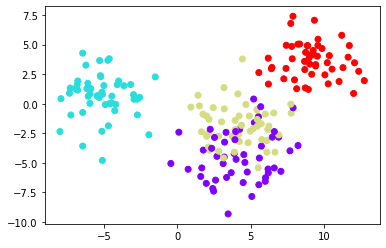

In [5]:
#Visualizing the data

plt.scatter(data[0][:,0],data[0][:,1], c=data[1], cmap='rainbow')
plt.show()

In [6]:
#Creating the Clusters
km = KMeans(n_clusters=4)

In [7]:
#fitting the model
km.fit(data[0])

KMeans(n_clusters=4)

In [8]:
#checking for centres
km.cluster_centers_

array([[ 4.49007517, -1.69456433],
       [ 9.06632404,  3.64305952],
       [-5.15404954,  0.67573735],
       [ 3.84423301, -5.43697023]])

In [9]:
#checking for labels
km.labels_

array([0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 3, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1,
       1, 0, 2, 3, 1, 3, 3, 1, 0, 0, 0, 2, 3, 1, 1, 2, 2, 2, 1, 0, 1, 1,
       1, 2, 1, 0, 3, 1, 1, 3, 0, 0, 1, 3, 1, 1, 1, 1, 3, 3, 2, 0, 1, 2,
       1, 0, 3, 0, 0, 2, 1, 0, 2, 0, 3, 1, 1, 1, 2, 0, 3, 3, 0, 2, 3, 1,
       3, 2, 1, 0, 3, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 3, 0, 0, 2, 2, 3, 0,
       0, 0, 3, 3, 1, 0, 2, 2, 0, 2, 3, 2, 0, 2, 1, 3, 3, 3, 3, 3, 3, 0,
       3, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 3, 3, 2, 1, 1, 0, 0,
       3, 0, 3, 2, 3, 2, 2, 2, 2, 1, 0, 2, 2, 2, 3, 2, 1, 0, 0, 1, 1, 1,
       2, 0, 3, 2, 1, 0, 3, 2, 1, 0, 2, 1, 2, 3, 1, 0, 2, 3, 0, 1, 2, 0,
       0, 2], dtype=int32)

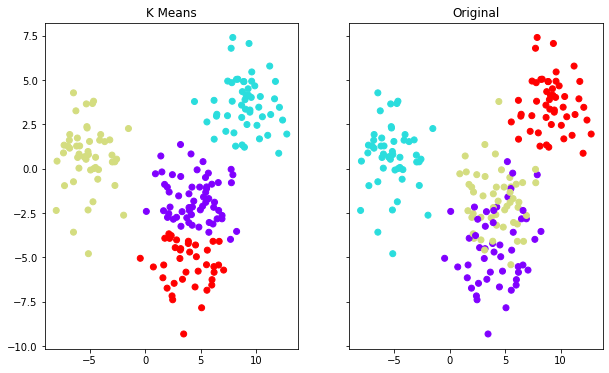

In [10]:
#Compare original data points with cluster data points visually
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=km.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

================================================================================

In [11]:
#Clustering using a different data set - Mall_Customers
market_data.head(11)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
#checking basic metadata
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
#defining variables X & y

X = market_data.iloc[:,[3,4]].values

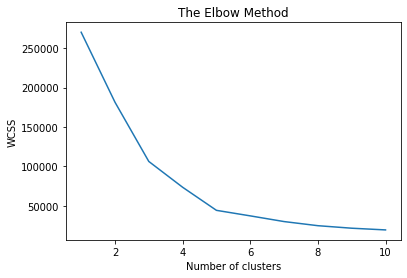

In [14]:
#Using the elbow method(wcss) to find the optimal number of clusters

#for loop for wcss
wcss = [] # within custer sum of squares

for i in range(1,11):
    km=KMeans(n_clusters=i, init='k-means++', random_state=43)
    km.fit(X)
    wcss.append(km.inertia_)

#plotting the wcss
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

In [15]:
#Training the K-Means model on the dataset
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 43)
y_km = km.fit_predict(X)
print(y_km)

#K-means++ is a smart centroid initialization method for the K-mean algorithm. The goal is to spread out the initial centroid by assigning the first centroid randomly then selecting the rest of the centroids based on the maximum squared distance. The idea is to push the centroids as far as possible from one another

[2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2
 4 2 4 2 4 2 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


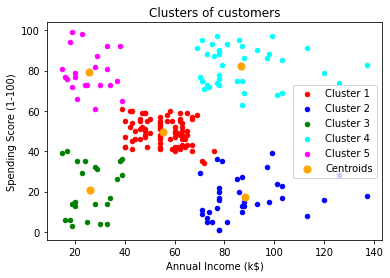

In [16]:
#Visualising the clusters
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'orange', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()